In [2]:
import pandas as pd

## Apr Usage

[FRAMED_IP_ADDRESS](https://www.cisco.com/c/en/us/td/docs/ios-xml/ios/sec_usr_radatt/configuration/xe-16/sec-usr-radatt-xe-16-book/sec-rad-ov-ietf-attr.html)

In [41]:
df2=pd.read_csv('may.csv')
df2.head()
df2.columns

Index(['SrNo', 'ACCT_SESSION_ID', 'FRAMED_IP_ADDRESS', 'NAS_IP_ADDRESS',
       'TERMINATE_CAUSE_STR', 'ACCT_SESSION_TIME', 'CALL_START', 'CALL_END',
       'USAGEMB', 'Duration', 'MAC_ID', 'Upload', 'Download', 'FRAMED_IPV6',
       'DELEGATE_IPV6'],
      dtype='object')

In [16]:
df = pd.read_csv('may.csv', index_col=0,usecols=['SrNo','CALL_START','CALL_END','USAGEMB','Duration','Upload','Download'],parse_dates=['CALL_START','CALL_END'])
df.head()

/tmp/ipykernel_1896/3437449424.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv('may.csv', index_col=0,usecols=['SrNo','CALL_START','CALL_END','USAGEMB','Duration','Upload','Download'],parse_dates=['CALL_START','CALL_END'])


,CALL_START,CALL_END,USAGEMB,Duration,Upload,Download
SrNo,,,,,,
1,2024-05-31 17:35:24,2024-06-01 01:56:06,5.94 GB,0d 8h :21m,225.51 MB,5.72 GB
2,2024-05-31 14:02:52,2024-05-31 17:25:32,5.08 GB,0d 3h :23m,147.13 MB,4.93 GB
3,2024-05-31 13:48:39,2024-05-31 14:00:47,439.44 MB,0d 0h :12m,20.09 MB,419.35 MB
4,2024-05-31 11:42:19,2024-05-31 12:04:40,91.45 MB,0d 0h :22m,7.14 MB,84.30 MB
5,2024-05-31 09:46:02,2024-05-31 11:15:17,1.64 GB,0d 1h :29m,51.37 MB,1.59 GB


In [42]:
df.to_excel('data_usage.xlsx', index=False)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 308 entries, 1 to 308
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   CALL_START  308 non-null    datetime64[ns]
 1   CALL_END    308 non-null    datetime64[ns]
 2   USAGEMB     308 non-null    object        
 3   Duration    308 non-null    object        
 4   Upload      308 non-null    object        
 5   Download    308 non-null    object        
dtypes: datetime64[ns](2), object(4)
memory usage: 16.8+ KB


In [45]:
df[['USAGEMB','CALL_START']].head(10)

,USAGEMB,CALL_START
SrNo,,
1,5.94 GB,2024-05-31 17:35:24
2,5.08 GB,2024-05-31 14:02:52
3,439.44 MB,2024-05-31 13:48:39
4,91.45 MB,2024-05-31 11:42:19
5,1.64 GB,2024-05-31 09:46:02
6,6.74 KB,2024-05-31 07:05:17
7,2.12 KB,2024-05-31 05:23:32
8,33.97 KB,2024-05-31 01:57:42
9,2.28 KB,2024-05-31 01:44:50


In [46]:
def convert_to_gb(usage):
    if 'KB' in usage:
        return float(usage.replace(' KB', '')) / (1024 * 1024)
    if 'MB' in usage:
        return float(usage.replace(' MB', '')) / 1024
    elif 'GB' in usage:
        return float(usage.replace(' GB', ''))
    else:
        return float(usage)


In [47]:
df['USAGE(GB)'] = df['USAGEMB'].apply(convert_to_gb).round(2)

In [48]:
df[['USAGE(GB)','CALL_START']].head(10)

,USAGE(GB),CALL_START
SrNo,,
1,5.94,2024-05-31 17:35:24
2,5.08,2024-05-31 14:02:52
3,0.43,2024-05-31 13:48:39
4,0.09,2024-05-31 11:42:19
5,1.64,2024-05-31 09:46:02
6,0.00,2024-05-31 07:05:17
7,0.00,2024-05-31 05:23:32
8,0.00,2024-05-31 01:57:42
9,0.00,2024-05-31 01:44:50


In [56]:
# Extract date from 'CALL_START'
df['DATE'] = df['CALL_START'].dt.date

# Group by date and sum 'USAGE(GB)'
dataUsage = df.groupby('DATE')['USAGE(GB)'].sum().reset_index()
dataUsage.head()

,DATE,USAGE(GB)
0,2024-05-01,0.98
1,2024-05-02,0.46
2,2024-05-03,7.44
3,2024-05-04,9.77
4,2024-05-05,15.94


In [52]:
import matplotlib.pyplot as plt

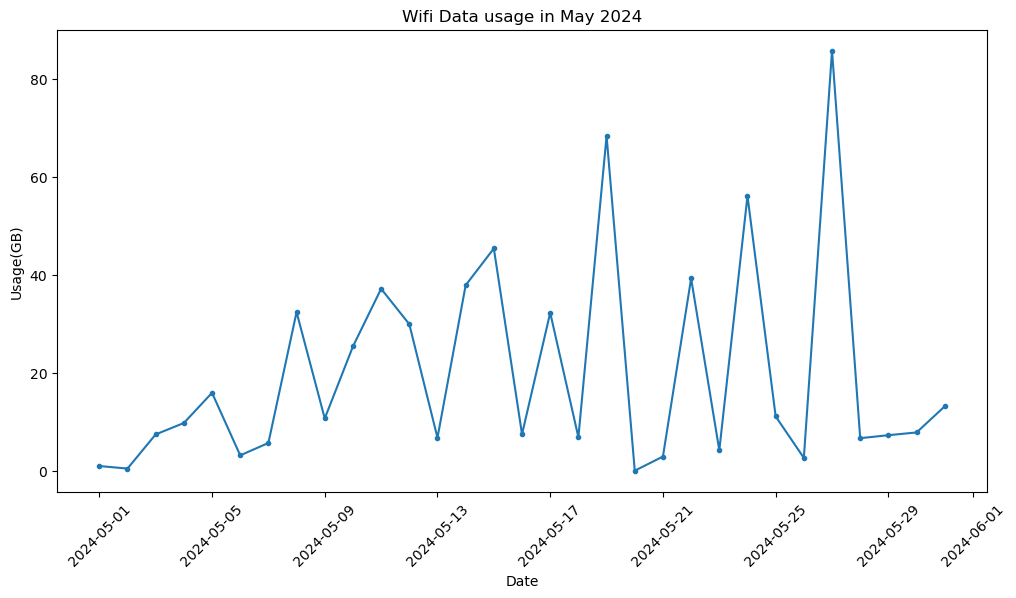

In [57]:
plt.figure(figsize=(12, 6))
plt.plot(dataUsage['DATE'], dataUsage['USAGE(GB)'], label='Data Usage',marker = '.')

plt.xlabel('Date')
plt.ylabel('Usage(GB)')
plt.title('Wifi Data usage in May 2024')
plt.xticks(rotation=45)
# plt.legend()
plt.show()

In [38]:
totalUsage =df['USAGE(GB)'].sum()
print(f'Total Data Usage in May 2024: {totalUsage} GB')

Total Data Usage in May 2024: 621.52 GB


In [43]:
maxUsage = df['USAGE(GB)'].max()
maxUsageDate = df[df['USAGE(GB)'] == maxUsage]['CALL_START'].dt.date.values[0]
print(f'Maximum Data Usage in May 2024: {maxUsage} GB on {maxUsageDate}')

Maximum Data Usage in May 2024: 68.44 GB on 2024-05-19


### upload and download dataSage

In [58]:
df['UPLOAD(GB)'] = df['Upload'].apply(convert_to_gb).round(2)
df['DOWNLOAD(GB)'] = df['Download'].apply(convert_to_gb).round(2)

In [59]:
usageDownUp = df.groupby('DATE')[['UPLOAD(GB)', 'DOWNLOAD(GB)']].sum().reset_index()
usageDownUp.head()

,DATE,UPLOAD(GB),DOWNLOAD(GB)
0,2024-05-01,0.05,0.92
1,2024-05-02,0.02,0.43
2,2024-05-03,0.34,7.09
3,2024-05-04,0.35,9.40
4,2024-05-05,0.54,15.38


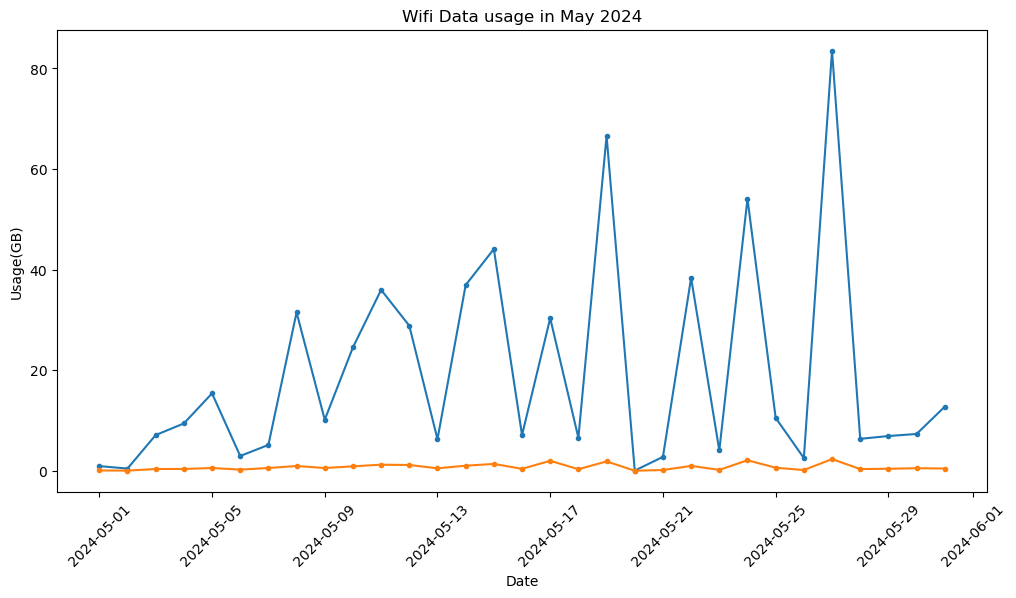

In [60]:
plt.figure(figsize=(12, 6))
plt.plot(usageDownUp['DATE'], usageDownUp['DOWNLOAD(GB)'], label='Download',marker = '.')

plt.plot(usageDownUp['DATE'], usageDownUp['UPLOAD(GB)'], label='Upload',marker = '.')

plt.xlabel('Date')
plt.ylabel('Usage(GB)')
plt.title('Wifi Data usage in May 2024')
plt.xticks(rotation=45)
# plt.legend()
plt.show()

In [61]:
def duration_to_minutes(duration):
    days, hours, minutes = 0, 0, 0
    
    # Parse days, hours, minutes from the string
    if 'd' in duration:
        days = int(duration.split('d')[0].strip())
        duration = duration.split('d')[1].strip()
    
    if 'h' in duration:
        hours = int(duration.split('h')[0].strip())
        duration = duration.split('h')[1].strip().lstrip(":")
        
    if 'm' in duration:
        minutes = int(duration.split('m')[0].strip())
    
    # Convert everything to minutes
    total_minutes = days * 24 * 60 + hours * 60 + minutes
    return total_minutes

In [63]:
df['Duration(min)']=df['Duration'].apply(duration_to_minutes)
df.head()

,CALL_START,CALL_END,USAGEMB,Duration,Upload,Download,USAGE(GB),DATE,UPLOAD(GB),DOWNLOAD(GB),Duration(min)
SrNo,,,,,,,,,,,
1,2024-05-31 17:35:24,2024-06-01 01:56:06,5.94 GB,0d 8h :21m,225.51 MB,5.72 GB,5.94,2024-05-31,0.22,5.72,501
2,2024-05-31 14:02:52,2024-05-31 17:25:32,5.08 GB,0d 3h :23m,147.13 MB,4.93 GB,5.08,2024-05-31,0.14,4.93,203
3,2024-05-31 13:48:39,2024-05-31 14:00:47,439.44 MB,0d 0h :12m,20.09 MB,419.35 MB,0.43,2024-05-31,0.02,0.41,12
4,2024-05-31 11:42:19,2024-05-31 12:04:40,91.45 MB,0d 0h :22m,7.14 MB,84.30 MB,0.09,2024-05-31,0.01,0.08,22
5,2024-05-31 09:46:02,2024-05-31 11:15:17,1.64 GB,0d 1h :29m,51.37 MB,1.59 GB,1.64,2024-05-31,0.05,1.59,89


In [65]:
usageTime= df.groupby('DATE')[['Duration(min)']].sum().reset_index()
usageTime.head()

,DATE,Duration(min)
0,2024-05-01,647
1,2024-05-02,283
2,2024-05-03,828
3,2024-05-04,708
4,2024-05-05,1033


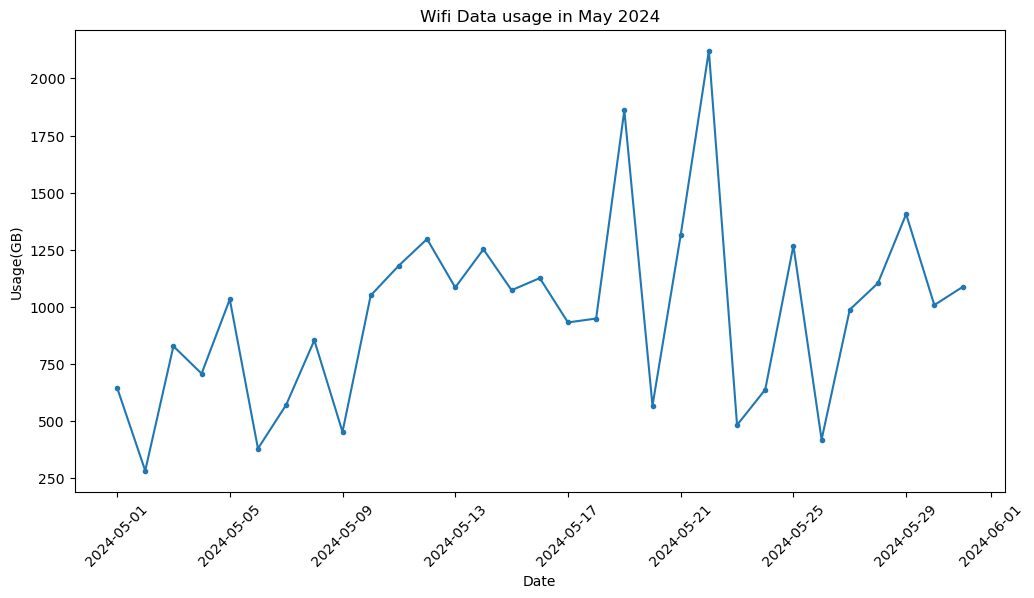

In [66]:
plt.figure(figsize=(12, 6))
plt.plot(usageTime['DATE'], usageTime['Duration(min)'], label='Data Usage',marker = '.')

plt.xlabel('Date')
plt.ylabel('Usage(GB)')
plt.title('Wifi Data usage in May 2024')
plt.xticks(rotation=45)
plt.show()